In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from implementation import *
from helpers import *

%load_ext autoreload
%autoreload 2

In [2]:
data = load_csv_data("data", sub_sample=True)

In [3]:
len(data)

5

In [4]:
x_train, x_test, y_train, train_ids, test_ids = data

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(train_ids.shape)
print(test_ids.shape)

(6563, 321)
(6563,)
(109379, 321)
(6563,)
(109379,)


In [6]:
#D = 321
#N = 6563
N, D = x_train.shape

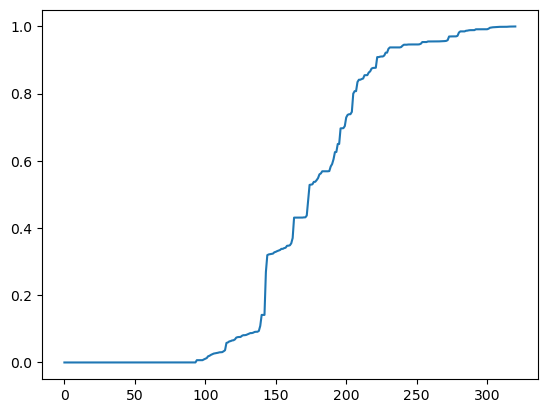

In [7]:
#92 dimension feature have no None.
nan_array = np.isnan(x_train)
sorted_nan = np.sort((nan_array.sum(axis=0)/N ), axis=0)
plt.plot(sorted_nan)

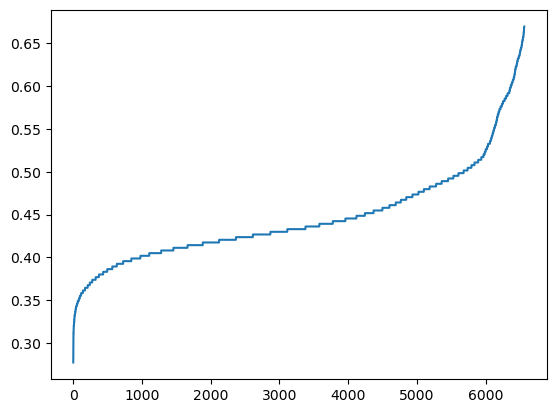

In [8]:
#0 sample has every feature
sorted_nan = np.sort((nan_array.sum(axis=1)/D ), axis=0)
plt.plot(sorted_nan)

In [9]:
#Remove every feature who has at least one nan.
x_train = x_train[:, ~np.isnan(x_train).any(axis=0)]
x_test = x_test[:, ~np.isnan(x_test).any(axis=0)]
x_train.shape

(6563, 92)

In [10]:
#Normaliaztion of feature
x_train, x_test, x_mean, x_std = standardize2(x_train, x_test)

In [11]:
D_prime = x_train.shape[1]
inital_w = np.zeros(D_prime)
print(y_train.shape)
print(x_train.shape)
print(inital_w.shape)

(6563,)
(6563, 92)
(92,)


In [12]:
max_iteration = 50
gamma = 0.01
losses, ws = mean_squared_error_gd(y_train, x_train, inital_w, max_iteration, gamma)

GD iter. 0/49: loss=1.0, w0=0.0012379970489197988, w1=0.001237997718908068
GD iter. 1/49: loss=0.36767564518495643, w0=0.0013370384164406801, w1=0.001337039138396965
GD iter. 2/49: loss=0.31708881227042535, w0=0.001344961736231534, w1=0.0013449624607133493
GD iter. 3/49: loss=0.31304179486637795, w0=0.0013455954847443774, w1=0.0013455962077962547
GD iter. 4/49: loss=0.31271802780498315, w0=0.001345646057358103, w1=0.0013456467786635987
GD iter. 5/49: loss=0.3126921259792366, w0=0.001345649975084204, w1=0.001345650694618002
GD iter. 6/49: loss=0.31269005378900805, w0=0.001345650160354108, w1=0.0013456508781141828
GD iter. 7/49: loss=0.31268988800295494, w0=0.0013456500470223707, w1=0.0013456507630085599
GD iter. 8/49: loss=0.31268987473190274, w0=0.0013456499098021602, w1=0.0013456506240144505
GD iter. 9/49: loss=0.3126898736622638, w0=0.0013456497706709142, w1=0.001345650483109304
GD iter. 10/49: loss=0.312689873568755, w0=0.0013456496313868584, w1=0.0013456503420513472
GD iter. 11/49:

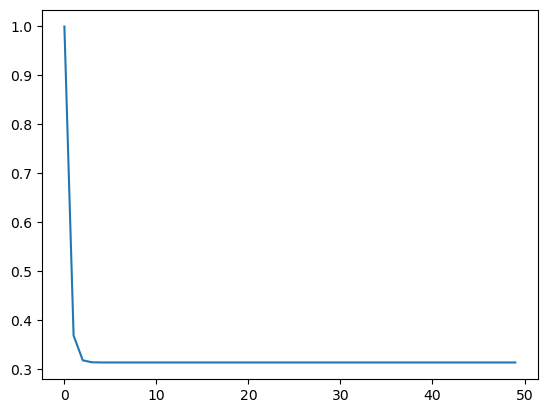

In [13]:
plt.plot(losses)

In [14]:
losses, ws = mean_squared_error_sgd(y_train, x_train, inital_w, max_iteration, gamma)

SGD iter. 0/49: loss=1.0, w0=-0.00149328735352438, w1=-0.001493287795943243
SGD iter. 1/49: loss=1.7627163699091322, w0=0.001373857075123981, w1=0.0013738578088720679
SGD iter. 2/49: loss=0.298243330666986, w0=0.0016031180105205692, w1=0.0016031189689389629
SGD iter. 3/49: loss=0.18114459100225083, w0=0.001621452477887859, w1=0.001621453438395477
SGD iter. 4/49: loss=0.171779941014462, w0=0.001622950212564228, w1=0.0016229511734473152
SGD iter. 5/49: loss=0.1710149593229329, w0=0.0016230261811481443, w1=0.0016230271420675897
SGD iter. 6/49: loss=0.17097811719785835, w0=0.0016230371635809985, w1=0.001623038124506701
SGD iter. 7/49: loss=0.17097541951382977, w0=0.0016231080794159747, w1=0.001623109040375617
SGD iter. 8/49: loss=0.17098773199896364, w0=0.0016230494671812133, w1=0.001623050428120819
SGD iter. 9/49: loss=0.17097393990750523, w0=0.0016230669035572247, w1=0.0016230678645135202
SGD iter. 10/49: loss=0.17097449425061942, w0=0.0016230245153905306, w1=0.0016230254763342678
SGD it

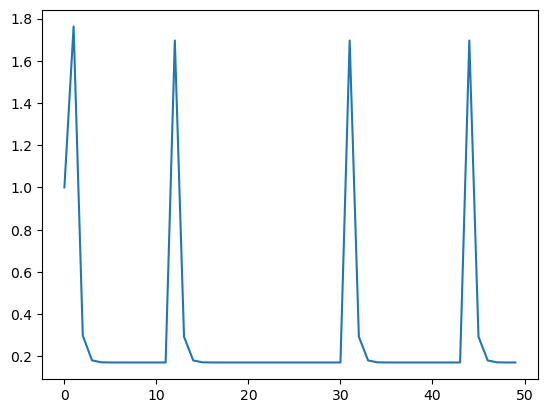

In [15]:
# I think it goes up when we have an outlier / error in the dataset. If we increase the batch size it should be better
plt.plot(losses)